<div class="alert alert-block alert-info">
<img src="https://storage.googleapis.com/cdn-1.pintaria.com/pintaria/providers/April2020/dqlab-200415032715.png" width="200" height="170">
<p style="text-align:center; font-size:200%; font-weight:bold">Eksplorasi dan Analisis Data COVID-19 Indonesia using Python</p>

## Hello there! 👋 I'm Andrean
I am a Mathematics Student at Diponegoro University. I have passion in `Data Analysis`, `Data Science`, `Programming`, and `Information Technology`. I have high curiosity, likes to learn new things, great in teamwork, and has a sense of responsibility. I am currently taking a data science course and also be a participant in **Studi Independen Kampus Merdeka** held by Ministry of Education, Culture, Research and Technology of the Republic of Indonesia.<br><br>

<p style="text-align:center; font-size:150%;">🔍 Find Me at</p>

|[LinkedIn](https://www.linkedin.com/in/andreanynthn)|[Instagram](https://instagram.com/andreanynthn)|[Gmail](mailto:and21yonathan@gmail.com)|
| ------------ | ------------ | ------------ |
    
</div>

### Latar Belakang

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.<br>

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah. Data yang dipergunakan merupakan data real time yang diambil langsung dari API (Application Programming Interface) yang tersedia di covid19.go.id

<i><b>Note: Data dalam project ini merupakan data real time sehingga hasilnya akan terus berubah seiring bertambahnya data</i>

### Import Library

In [76]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Mengakses API covid19.go.id

In [77]:
resp = requests.get('https://data.covid19.go.id/public/api/update.json', verify=False)
print(resp)

<Response [200]>


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<i>Response [200] yang menandakan permintaan telah dipenuhi</i>

### Mengetahui Headers resp

In [78]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Wed, 20 Oct 2021 15:26:14 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Wed, 20 Oct 2021 15:21:11 GMT', 'ETag': 'W/"617033e7-38905"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


### Mengekstrak Isi Respon

Jalankan method `json()` pada obyek resp dan simpanlah hasilnya sebagai `cov_id_raw`.<br>
Dengan menggunakan fungsi `len()` dan method `keys()` cobalah amati ada berapa komponen serta apa saja nama komponen dalam obyek `cov_id_raw` tersebut! Kemudian ekstraklah key ke-2 dan simpan dengan nama `cov_id_update`.

In [79]:
cov_id_raw = resp.json()
cov_id_raw

{'data': {'id': 1,
  'jumlah_odp': 6706,
  'jumlah_pdp': 0,
  'total_spesimen': 44111272,
  'total_spesimen_negatif': 34553212},
 'update': {'penambahan': {'jumlah_positif': 914,
   'jumlah_meninggal': 28,
   'jumlah_sembuh': 1207,
   'jumlah_dirawat': -321,
   'tanggal': '2021-10-20',
   'created': '2021-10-20 17:33:10'},
  'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
    'key': 1583107200000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_dirawat': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh_kum': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2}},
   {'key_as_string': '2020-03-03T00:00:00.000Z',
    'key': 1583193600000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_dirawat': {'value': 0},
    'jumlah_positif_kum

In [80]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [81]:
cov_id_update = cov_id_raw['update']

### Analisis Data

Sekarang Anda diminta untuk fokus pada obyek `cov_id_update` untuk menjawab pertanyaan-pertanyaan berikut:

1. Kapan tanggal pembaharuan data penambahan kasus?
2. Berapa jumlah penambahan kasus sembuh?
3. Berapa jumlah penambahan kasus meninggal?
4. Berapa jumlah total kasus positif hingga saat ini?
5. Berapa jumlah total kasus meninggal hingga saat ini?

In [82]:
# Kapan tanggal pembaharuan data penambahan kasus?
print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])

# Berapa jumlah penambahan kasus sembuh?
print('Jumlah penambahan kasus sembuh   :', cov_id_update['penambahan']['jumlah_sembuh'])

# Berapa jumlah penambahan kasus meninggal?
print('Jumlah penambahan kasus meninggal   :', cov_id_update['penambahan']['jumlah_meninggal'])

# Berapa jumlah total kasus positif hingga saat ini?
print('Jumlah total kasus positif hingga saat ini   :', cov_id_update['total']['jumlah_positif'])

# Berapa jumlah total kasus meninggal hingga saat ini?
print('Jumlah total kasus meninggal hingga saat ini   :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-10-20
Jumlah penambahan kasus sembuh   : 1207
Jumlah penambahan kasus meninggal   : 28
Jumlah total kasus positif hingga saat ini   : 4237201
Jumlah total kasus meninggal hingga saat ini   : 143077


### Apa Kabar Jawa Barat?

In [83]:
# mengakses dan mengekstrak API
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json',
                          verify=False)
cov_jabar_raw = resp_jabar.json()
resp_jabar

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>

### Memahami Kasus Covid-19 di Jawa Barat
Sekarang jalankanlah method `keys()` pada `cov_jabar_raw` tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

1. Kapan tanggal pembaharuan data?
2. Berapa jumlah total kasus COVID-19 di Jawa Barat?
3. Berapa persentase kematian akibat COVID-19 di Jawa Barat?
4. Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?

In [84]:
# nama-nama elemen utama
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())

# tanggal pembaharuan data
print('\nTanggal pembaharuan data COVID-19 di Jawa Barat           : %s' %cov_jabar_raw['last_date'])

# jumlah total kasus positif di Jawa Barat
print('Jumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])

# persentase kematian akibat covid-19 di Jawa Barat
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])

# persentase tingkat kesembuhan covid-19 di Jawa Barat
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Tanggal pembaharuan data COVID-19 di Jawa Barat           : 2021-10-20
Jumlah total kasus COVID-19 di Jawa Barat                 : 704642
Persentase kematian akibat COVID-19 di Jawa Barat         : 2.081766.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 97.667752.2%


### Memperoleh Informasi yang Lebih Lengkap
Data historis perkembangan COVID-19 tersimpan dengan nama `list_perkembangan`. Silakan Anda ekstrak data tersebut dari `cov_jabar_raw` dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. Kemudian simpanlah hasilnya sebagai obyek bernama `cov_jabar!` Amati struktur `cov_jabar` menggunakan method `info()` dan `head()`.

In [85]:
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       596 non-null    int64
 1   KASUS                         596 non-null    int64
 2   MENINGGAL                     596 non-null    int64
 3   SEMBUH                        596 non-null    int64
 4   DIRAWAT_OR_ISOLASI            596 non-null    int64
 5   AKUMULASI_KASUS               596 non-null    int64
 6   AKUMULASI_SEMBUH              596 non-null    int64
 7   AKUMULASI_MENINGGAL           596 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  596 non-null    int64
dtypes: int64(9)
memory usage: 42.0 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

### Menjinakan Data

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data `cov_jabar`, yaitu:

1. Menghapus kolom `DIRAWAT_OR_ISOLASI` dan semua kolom yang berisi nilai kumulatif
2. Merubah format penulisan semua kolom menjadi huruf kecil
3. Mengganti nama kolom `kasus` menjadi `kasus_baru`
4. Memperbaiki tipe data pada kolom `tanggal` menggunakan `pd.to_datetime`

In [86]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


### Menunjukkan Melalui Gambar
Membuat bar-chart jumlah kasus baru harian COVID-19 di Jawa Barat menggunakan data `cov_jabar_tidy`! Pergunakan kolom tanggal sebagai sumbu-x.

<Figure size 432x288 with 0 Axes>

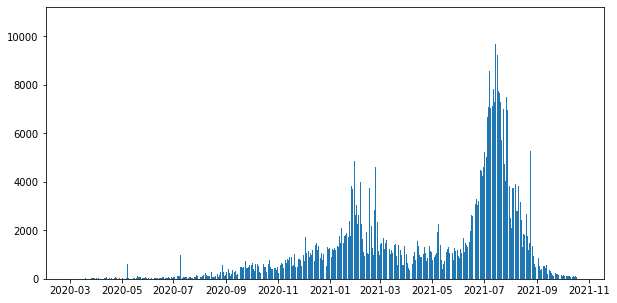

In [87]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

### Informasi Pada Grafik

C:\Users\USER\AppData\Local\Temp/ipykernel_7604/3765164210.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

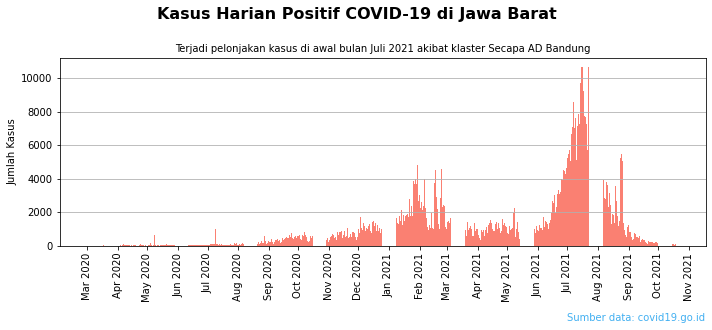

In [88]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli 2021 akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.4, 'Sumber data: covid19.go.id', color='#43B0F1',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
# plt.savefig('Kasus Harian Positif - Jawa Barat.png', format = 'png')
plt.show()

### Grafik untuk Kasus Sembuh

C:\Users\USER\AppData\Local\Temp/ipykernel_7604/1652601829.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

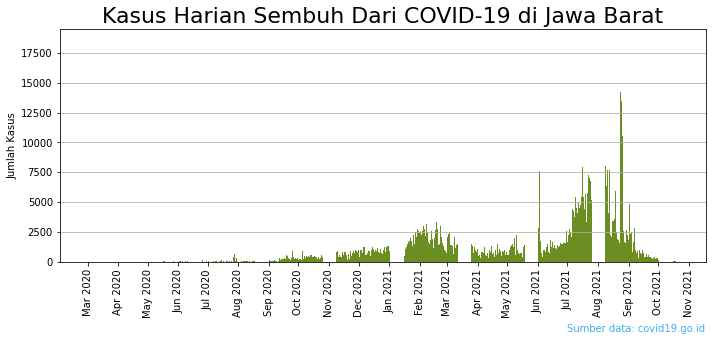

In [89]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='#43B0F1',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
# plt.savefig('Kasus Harian Sembuh - Jawa Barat.png', format = 'png')
plt.show()

### Grafik untuk Kasus Meninggal

C:\Users\USER\AppData\Local\Temp/ipykernel_7604/4270388294.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

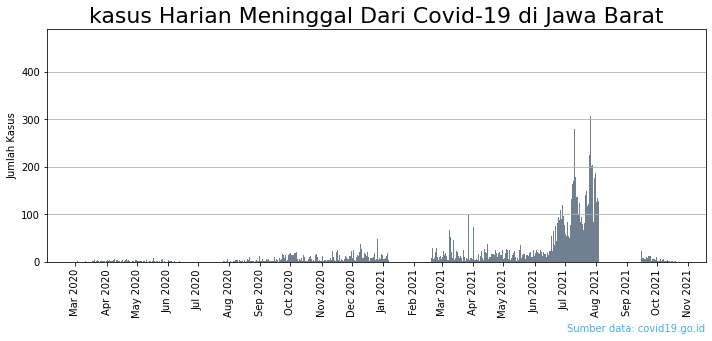

In [90]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('kasus Harian Meninggal Dari Covid-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='#43B0F1',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
# plt.savefig('Kasus Harian Meninggal - Jawa Barat.png', format = 'png')
plt.show()

### Apakah Pekan Ini Lebih Baik?
Hitung pertambahan kasus pekanan dan simpanlah hasilnya sebagai `cov_jabar_pekanan`! Anda juga diminta untuk menggunakan method `info()` dan `.head()` untuk melakukan inspeksi data.

In [91]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     86 non-null     int64
 1   pekan_ke  86 non-null     int64
 2   jumlah    86 non-null     int64
dtypes: int64(3)
memory usage: 2.1 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


### Apakah Pekan Ini Lebih Baik Dari Pekan Kemarin?
Demi menjawab hal tersebut Anda melakukan kalkulasi sederhana dengan tahapan berikut:

* Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama `jumlah_pekanlalu`.
* Mengganti nilai `NaN` pada kolom `jumlah_pekanlalu` dengan nilai 0
* Melakukan komparasi antara kolom `jumlah` dengan kolom `jumlah_pekanlalu`. Hasil komparasi ini disimpan dalam kolom baru dengan nama `lebih_baik`, isinya adalah `True` apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

In [92]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data terbaru:\n', cov_jabar_pekanan.tail(10))

Sepuluh data terbaru:
     tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
76   2021        33   14183             19461        True
77   2021        34   20188             14183       False
78   2021        35    5423             20188        True
79   2021        36    3942              5423        True
80   2021        37    1991              3942        True
81   2021        38    1414              1991        True
82   2021        39    1078              1414        True
83   2021        40     679              1078        True
84   2021        41     654               679        True
85   2021        42     172               654        True


C:\Users\USER\AppData\Local\Temp/ipykernel_7604/3814572171.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


### Membuat Bar Chart

<Figure size 432x288 with 0 Axes>

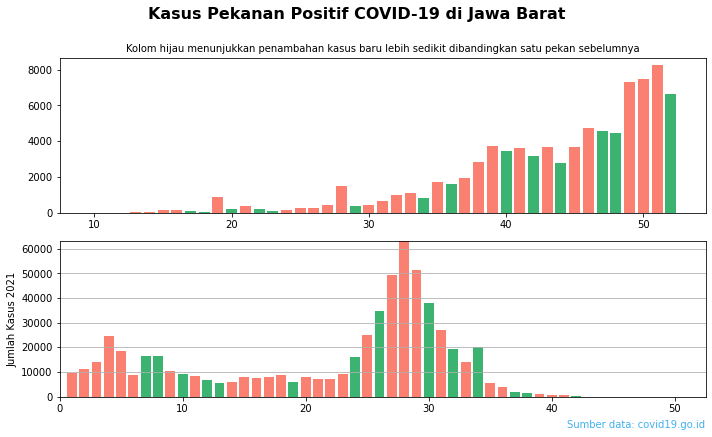

In [93]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
             y=1.00, fontsize=16, fontweight='bold', ha='center')

for i, ax in enumerate(axes):
    ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
           x='pekan_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon'
                                                 for x in cov_jabar_pekanan['lebih_baik']])
    
    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize=10)
        
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid19.go.id', color='#43B0F1', ha='right', transform=ax.transAxes)
        ax.set_xlim([0, 52.5])
        ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
        ax.set_xlabel('')
        ax.set_ylabel('Jumlah Kasus %d' %(tahun_terjadi_covid19[i],))
        ax.grid(axis='y')
        
plt.tight_layout()
plt.savefig('Kasus Pekanan Positif - Jawa Barat.png', format = 'png')
plt.show()

### Hingga Saat Ini Ada Berapa Kasus yang Masih Aktif?
<i>note: aktif dalam artian sedang dalam perawatan atau isolasi</i><br>
Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal.

In [94]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] -
                                          cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
591 2021-10-15             1709            687919                14664
592 2021-10-16             1738            687997                14665
593 2021-10-17             1726            688079                14665
594 2021-10-18             1706            688165                14666
595 2021-10-19             1770            688204                14668


### Membuat Line Chart Pola Kasus Aktif

C:\Users\USER\AppData\Local\Temp/ipykernel_7604/1112695154.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

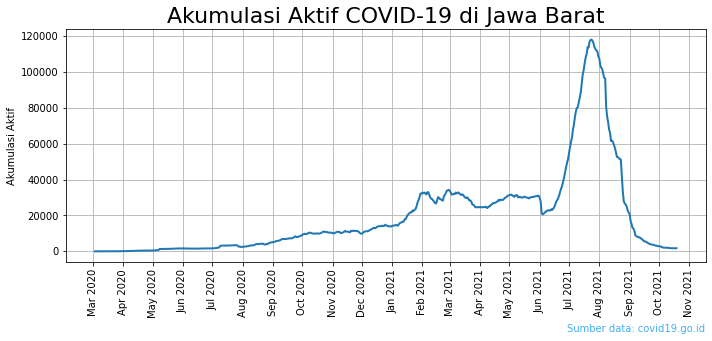

In [95]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi Aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='#43B0F1',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
# plt.savefig('Akumulasi Aktif - Jawa Barat.png', format = 'png')
plt.show()

### Tahap Akhir

<Figure size 432x288 with 0 Axes>

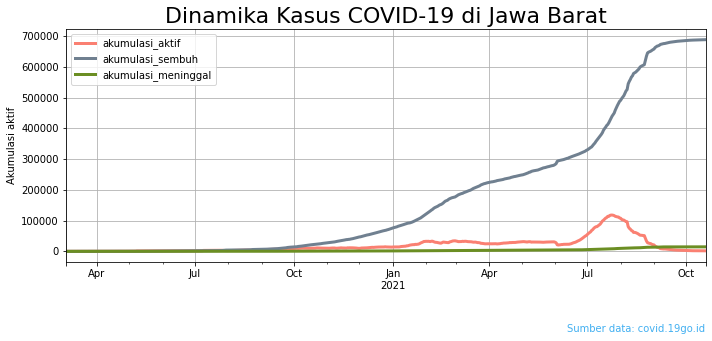

In [96]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                            color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19go.id', color='#43B0F1',
        ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
# plt.savefig('Dinamika Kasus Covid-19 - Jawa Barat.png', format = 'png')
plt.show()